In [4]:
# Data import
import pandas as pd

df=pd.read_csv("BankChurners.csv",skipinitialspace=True)

df.drop(["CLIENTNUM","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"],axis=1,inplace=True)

# Make target value binary
df = df.replace(
    {
        "Attrition_Flag": {
            "Existing Customer": 0,
            "Attrited Customer": 1,
        }
    }
)


# Feature selection for modeling
#X = df.drop(columns=["Attrition_Flag"])
#X = df[["Total_Trans_Ct","Total_Trans_Amt"]]
X = df[["Total_Trans_Ct","Total_Trans_Amt", "Total_Revolving_Bal", "Total_Amt_Chng_Q4_Q1", "Total_Ct_Chng_Q4_Q1", "Total_Relationship_Count", "Months_Inactive_12_mon", "Contacts_Count_12_mon", "Customer_Age", "Credit_Limit", "Months_on_book"]]

# Selecting the "Attrition_Flag" column as the target
y = df["Attrition_Flag"]

X

,Total_Trans_Ct,Total_Trans_Amt,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Customer_Age,Credit_Limit,Months_on_book
0,42,1144,777,1.335,1.625,5,1,3,45,12691.0,39
1,33,1291,864,1.541,3.714,6,1,2,49,8256.0,44
2,20,1887,0,2.594,2.333,4,1,0,51,3418.0,36
3,20,1171,2517,1.405,2.333,3,4,1,40,3313.0,34
4,28,816,0,2.175,2.500,5,1,0,40,4716.0,21
...,...,...,...,...,...,...,...,...,...,...,...
10122,117,15476,1851,0.703,0.857,3,2,3,50,4003.0,40
10123,69,8764,2186,0.804,0.683,4,2,3,41,4277.0,25
10124,60,10291,0,0.819,0.818,5,3,4,44,5409.0,36
10125,62,8395,0,0.535,0.722,4,3,3,30,5281.0,36


In [5]:
# eXtreme Gradient Boost Classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
import xgboost as xgb

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of RandomOverSampler
ros = RandomOverSampler(random_state=42)
# Resample the dataset
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

# Initializing the xgboost model
xgb = xgb.XGBClassifier(
    learning_rate=0.05,
    max_depth=4,
    min_child_weight=1,
    n_estimators=500,
    subsample=0.4331229815476772,
    colsample_bytree=0.5242723167060505,
    reg_lambda=7.049263425549493e-06,
    reg_alpha=0.015123845878697514,
)

# Fitting the model to the training data
xgb.fit(X_train_res, y_train_res)

# Save the model in bin format
xgb.save_model("model.bin")

# Print model score
print("Score: ", xgb.score(X_test, y_test))

# Making predictions on the test set
y_pred = xgb.predict(X_test)

# Creating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print("\n")
print("Confusion Matrix:\n", cm)
print("\n")

# Printing the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Score:  0.9629812438302073


Confusion Matrix:
 [[1650   49]
 [  26  301]]


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1699
           1       0.86      0.92      0.89       327

    accuracy                           0.96      2026
   macro avg       0.92      0.95      0.93      2026
weighted avg       0.96      0.96      0.96      2026



In [3]:
# Example code to make probability prediction, for this example it's mandatory to retrain the model with two features for X (comment/uncomment on first cell 
# to switch the "X" input)
# Create a new dataframe with Total_Trans_Ct and Total_Trans_Amt to simulate a user input
A = 20 # 20 = High probability to churn, 80 = Low probability to churn
B = 40000
user_input = pd.DataFrame([[A, B]], columns=["Total_Trans_Ct", "Total_Trans_Amt"])

# Make prediction and print the probability in percent
prediction = xgb.predict_proba(user_input)
print("This customer have", round(prediction[0][1]*100),"% chance to churn")

This customer have 94 % chance to churn


<AxesSubplot: xlabel='Attrition_Flag', ylabel='count'>

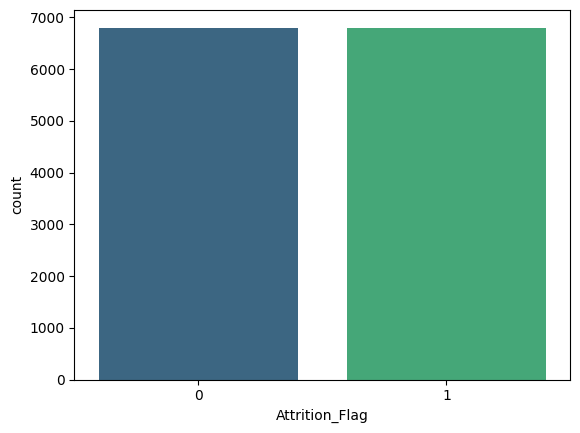

In [31]:
import seaborn as sns

# Show the value distribution after upsampling
sns.countplot(data=X_train_res,x=y_train_res,palette="viridis")


In [ ]:
# Results :

# Without resampling
Score:  0.9669299111549852

Confusion Matrix:
 [[1671   28]
 [  39  288]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1699
           1       0.91      0.88      0.90       327

    accuracy                           0.97      2026
   macro avg       0.94      0.93      0.94      2026
weighted avg       0.97      0.97      0.97      2026

--------------------------------------------------------

# With upsampling
Score:  0.9629812438302073

Confusion Matrix:
 [[1650   49]
 [  26  301]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1699
           1       0.86      0.92      0.89       327

    accuracy                           0.96      2026
   macro avg       0.92      0.95      0.93      2026
weighted avg       0.96      0.96      0.96      2026